In [83]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import seaborn as sns
import wordcloud

In [84]:
df = pd.read_csv("SMSSpamCollection", sep="\t", names=["Label", "Message"])
df.tail()

,Label,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [85]:
# dct1 = {"Label":[], "Message":[]}
# with open("SMSSpamCollection", 'r', encoding='utf-8') as f:
#     for line in f.readlines():
#         split = line.strip().split()
#         dct1["Label"].append(split[0])
#         dct1["Message"].append(" ".join(split[1:]))
#
# df = pd.DataFrame(data=dct1, columns=["Label", "Message"])
# df

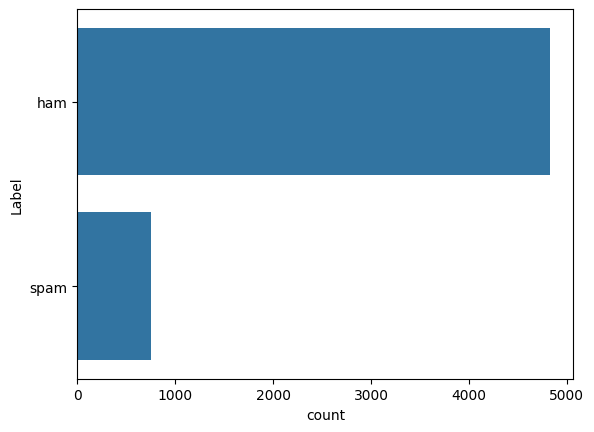

In [86]:
sns.countplot(df["Label"]);

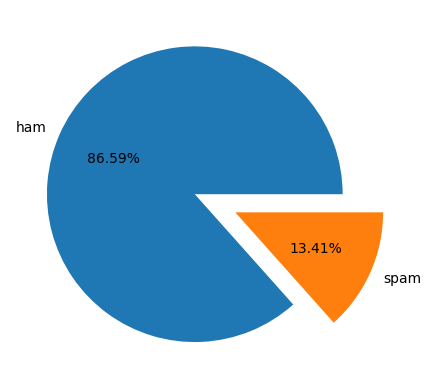

In [87]:
plt.pie(df["Label"].value_counts(), labels=df["Label"].value_counts().index, autopct="%1.2f%%", explode=[0, 0.3]);

In [88]:
X=df['Message']
y=df['Label']

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       1.00      0.93      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [90]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords


In [91]:
swords=stopwords.words('english')
ps=PorterStemmer()
wnl=WordNetLemmatizer()


In [92]:
def clean_text(sent):
    tokens1=word_tokenize(sent.lower())
    tokens2=[token for token in tokens1 if token.isalpha()]
    tokens3=[ps.stem(token) for token in tokens2 if token not in swords]
    return tokens3

In [93]:
sent="Hello Friends! How are you? Welcome to Python Programming."

In [94]:
clean_text(sent)

['hello', 'friend', 'welcom', 'python', 'program']

In [95]:
def clean_text_lemma(sent):
    tokens1=word_tokenize(sent.lower())
    tokens2=[token for token in tokens1 if token.isalpha()]
    tokens3=[token for token in tokens2 if token not in swords]
    tags = pos_tag(tokens3)
    tokens4=[]
    for word in tags:
        if word[1].startswith('N'):
             tokens4.append(wnl.lemmatize(word[0], pos='n'))
        if word[1].startswith('V'):
             tokens4.append(wnl.lemmatize(word[0], pos='v'))
        if word[1].startswith('J'):
             tokens4.append(wnl.lemmatize(word[0], pos='a'))
    return tokens4

In [97]:
sent = "Hello Friends! How are you? Welcome to Python Programming."
clean_text(sent)

['hello', 'friend', 'welcom', 'python', 'program']

In [104]:
ham = X[y == "ham"]
spam = X[y == "spam"]

In [105]:
ham, spam

(0       Go until jurong point, crazy.. Available only ...
 1                           Ok lar... Joking wif u oni...
 3       U dun say so early hor... U c already then say...
 4       Nah I don't think he goes to usf, he lives aro...
 6       Even my brother is not like to speak with me. ...
                               ...                        
 5565                                         Huh y lei...
 5568                 Will ü b going to esplanade fr home?
 5569    Pity, * was in mood for that. So...any other s...
 5570    The guy did some bitching but I acted like i'd...
 5571                           Rofl. Its true to its name
 Name: Message, Length: 4825, dtype: object,
 2       Free entry in 2 a wkly comp to win FA Cup fina...
 5       FreeMsg Hey there darling it's been 3 week's n...
 8       WINNER!! As a valued network customer you have...
 9       Had your mobile 11 months or more? U R entitle...
 11      SIX chances to win CASH! From 100 to 20,000 po...
           

In [106]:
ham.shape, spam.shape

((4825,), (747,))

In [108]:
ham_messages = " ".join(ham)
spam_messages = " ".join(spam)

In [110]:
ham.sum()

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...Ok lar... Joking wif u oni...U dun say so early hor... U c already then say...Nah I don\'t think he goes to usf, he lives around here thoughEven my brother is not like to speak with me. They treat me like aids patent.As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends CallertuneI\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today.I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.I HAVE A DATE ON SUNDAY WITH WILL!!Oh k...i\'m watching here:)Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet.Fine if that\x92s the way u feel. That\x92s the way its g

In [111]:
len(spam_messages)

104333

In [112]:
len(ham_messages)

349727

In [113]:
from wordcloud import WordCloud

In [117]:
wc_spam=WordCloud(background_color='white',max_words=50).generate(spam_messages)


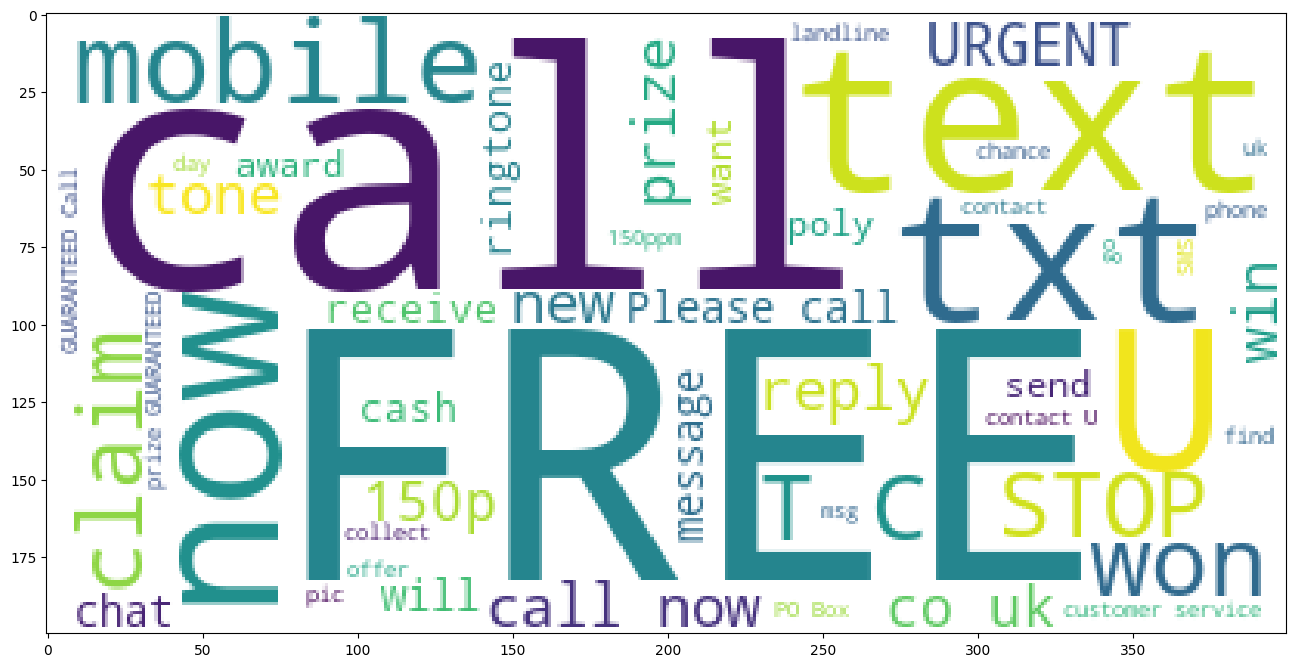

In [118]:
plt.figure(figsize=(16,10))
plt.imshow(wc_spam)

In [119]:
wc_spam=WordCloud(background_color='white',max_words=50).generate(ham_messages)


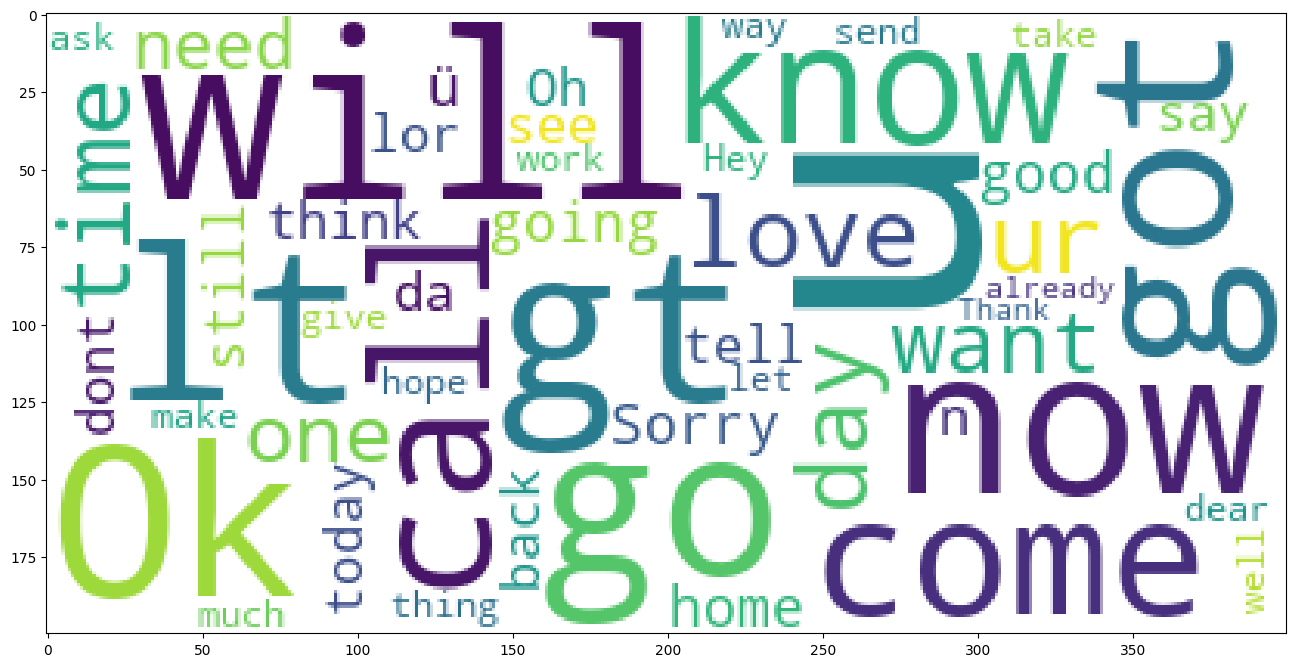

In [120]:
plt.figure(figsize=(16,10))
plt.imshow(wc_spam)

In [121]:
X.apply(clean_text)

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, wkli, comp, win, fa, cup, final,...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [time, tri, contact, u, pound, prize, claim, e...
5568                       [ü, b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: Message, Length: 5572, dtype: object

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [123]:
tfidf=TfidfVectorizer(analyzer=clean_text)

In [124]:
x_vect=tfidf.fit_transform(X)

In [125]:
x_vect.shape

(5572, 5925)

In [126]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(x_vect, y, random_state=0) # Default train size = 75% and test size = 25%

In [134]:
X_train.shape

(4179, 5925)

In [135]:
X_test.shape

(1393, 5925)

In [136]:
#Build Model
from sklearn.svm import SVC

In [138]:
svm=SVC(kernel='linear')

In [139]:
svm.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [140]:
y_pred=svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.88      0.93       185

    accuracy                           0.98      1393
   macro avg       0.98      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [141]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       1.00      0.86      0.92       185

    accuracy                           0.98      1393
   macro avg       0.99      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [142]:
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1208
        spam       1.00      0.62      0.77       185

    accuracy                           0.95      1393
   macro avg       0.97      0.81      0.87      1393
weighted avg       0.95      0.95      0.94      1393



In [143]:
svm = SVC(kernel='sigmoid')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.98      0.87      0.92       185

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [144]:
with open('sample.csv','r') as f:
    ls=f.readlines()
test=tfidf.transform(ls)

In [145]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [146]:
y_pred=svm.predict(test)

In [147]:
print(y_pred)

['ham' 'spam' 'ham']


In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=df["Label"])
tfidf1 = TfidfVectorizer(stop_words='english')
X_trn_trns = tfidf1.fit_transform(X_train)
X_tst_trns = tfidf1.transform(X_test)
svc1 = SVC()
svc1.fit(X_trn_trns, y_train)
y_pred = svc1.predict(X_tst_trns)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1206
        spam       0.98      0.84      0.91       187

    accuracy                           0.98      1393
   macro avg       0.98      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [153]:
test=tfidf1.transform(ls)
y_pred = svc1.predict(test)
print(y_pred)

['ham' 'spam' 'ham']
